In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt






In [4]:
#1.Dataset Selection

iris_data = sns.load_dataset("iris")

Iris Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

Missing Values in Each Column:
s

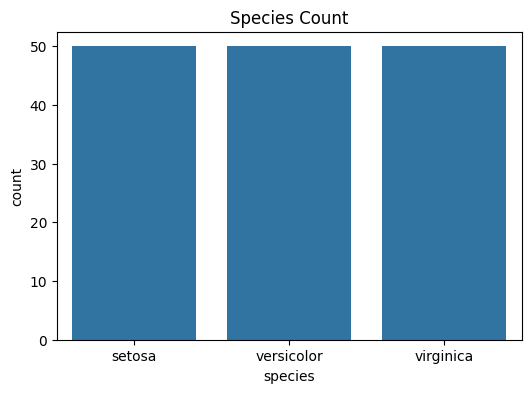

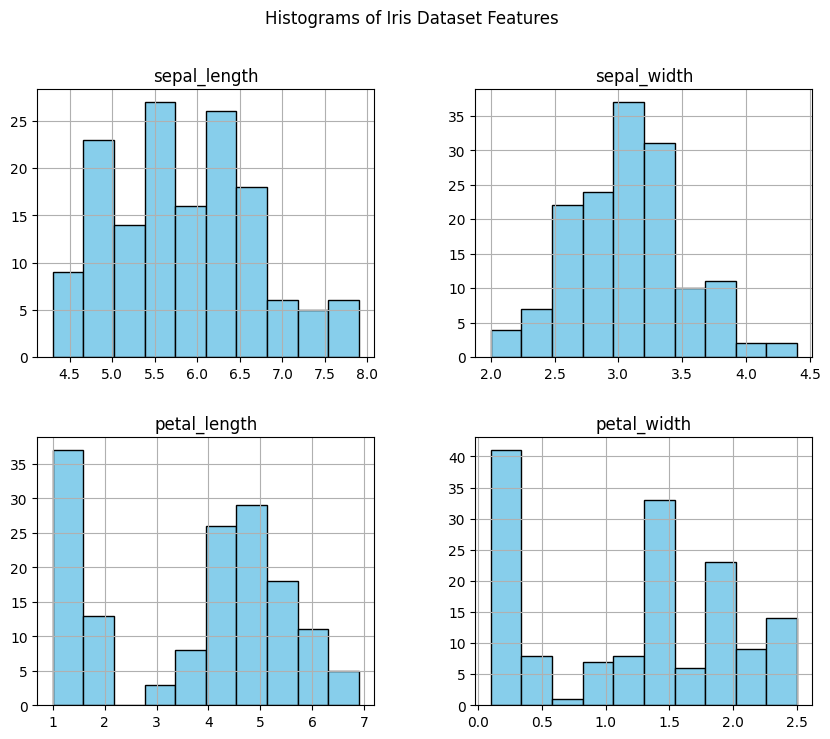

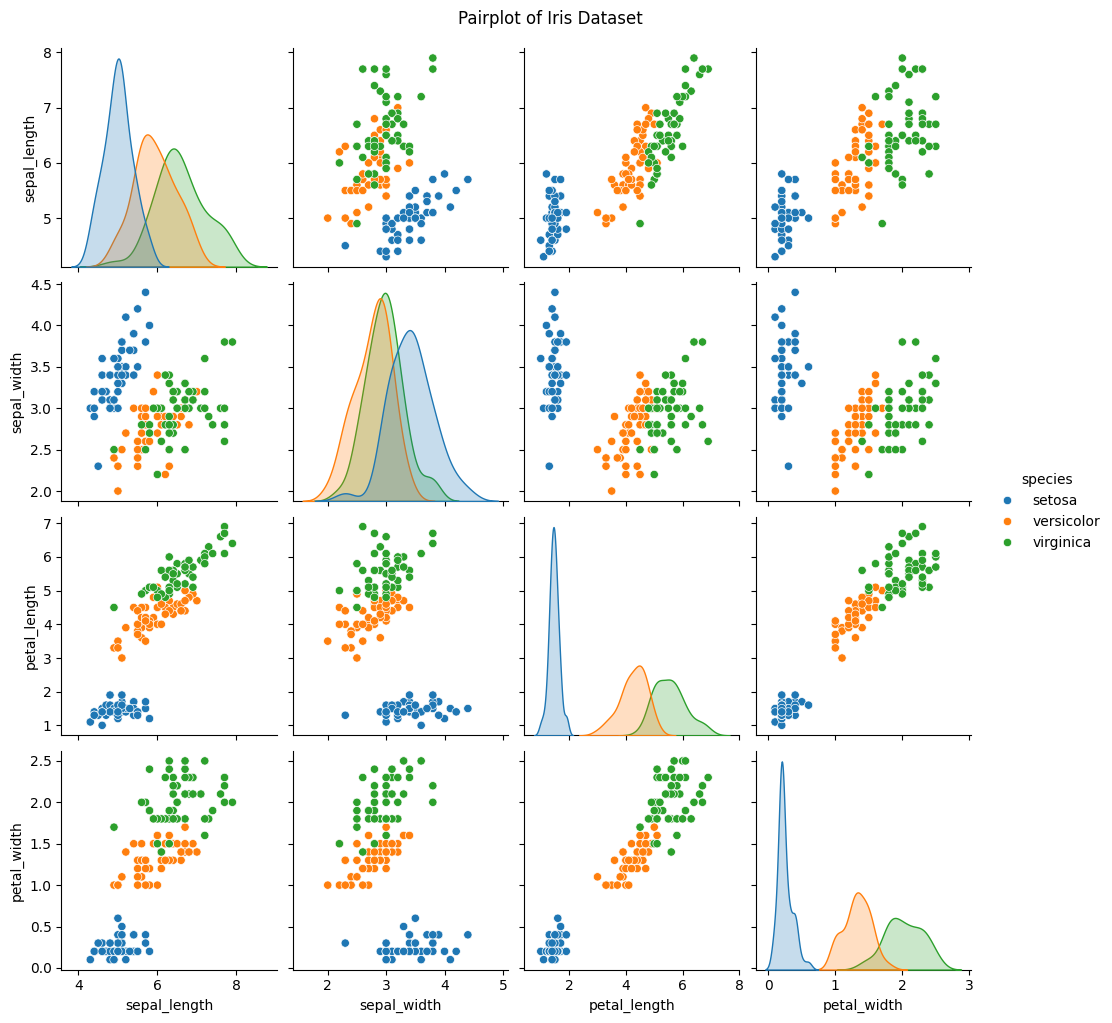

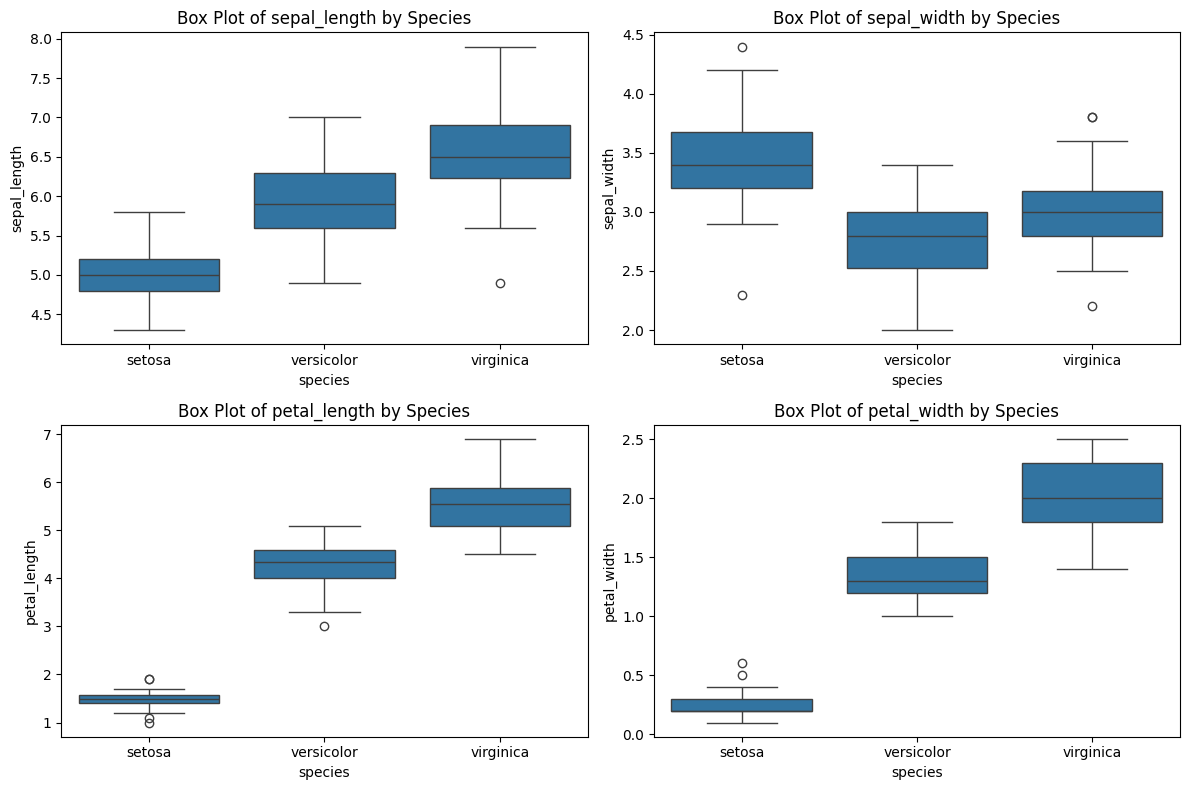

In [5]:
#2.Data Preprocessing

# Display first few rows of the dataset
print("Iris Dataset Preview:")
print(iris_data.head())

# Display summary statistics
print("\nSummary Statistics:")
print(iris_data.describe())

# Check for missing values
print("\nMissing Values in Each Column:")
print(iris_data.isnull().sum())

# Count plot for target variable (species)
plt.figure(figsize=(6, 4))
sns.countplot(data=iris_data, x='species')
plt.title("Species Count")
plt.show()

# Histograms of all numeric features
iris_data.hist(figsize=(10, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Iris Dataset Features")
plt.show()

# Scatter plots to visualize relationships between features
sns.pairplot(iris_data, hue="species", diag_kind='kde')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()

# Box plots of features grouped by species
plt.figure(figsize=(12, 8))
for i, column in enumerate(iris_data.columns[:-1]):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=iris_data, x="species", y=column)
    plt.title(f"Box Plot of {column} by Species")
plt.tight_layout()
plt.show()

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler  # Import LabelEncoder and StandardScaler

# Step 1: Handle Missing Values
# Check for missing values
missing_values = iris_data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


# Step 2: Encode Categorical Variable (species)
# Encoding the 'species' column
label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

# Mapping the encoded labels back for reference
species_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nSpecies Encoding Mapping:", species_mapping)

# Step 3: Standardize Features
# Separate features and target variable
X = iris_data.drop(columns='species')
y = iris_data['species']

# Standardize the feature columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier interpretation
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nStandardized Features (first 5 rows):")
print(X_scaled_df.head())

# Reassemble the dataset if needed
iris_preprocessed = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
print("\nPreprocessed Iris Dataset (first 5 rows):")
print(iris_preprocessed.head())

Missing Values in Each Column:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Species Encoding Mapping: {'setosa': 0, 'versicolor': 1, 'virginica': 2}

Standardized Features (first 5 rows):
   sepal_length  sepal_width  petal_length  petal_width
0     -0.900681     1.019004     -1.340227    -1.315444
1     -1.143017    -0.131979     -1.340227    -1.315444
2     -1.385353     0.328414     -1.397064    -1.315444
3     -1.506521     0.098217     -1.283389    -1.315444
4     -1.021849     1.249201     -1.340227    -1.315444

Preprocessed Iris Dataset (first 5 rows):
   sepal_length  sepal_width  petal_length  petal_width  species
0     -0.900681     1.019004     -1.340227    -1.315444        0
1     -1.143017    -0.131979     -1.340227    -1.315444        0
2     -1.385353     0.328414     -1.397064    -1.315444        0
3     -1.506521     0.098217     -1.283389    -1.315444        0
4     -1.021849     1.249201     -1.340227    -1

In [8]:
#3.Model Implementation

# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split the data into features (X) and target (y)
X = iris_preprocessed.drop(columns='species')
y = iris_preprocessed['species']

# Split the dataset into training and testing sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=200, random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train each model on the training set
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)

# Calculate and print accuracy for each model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)

print("Model Performance on Test Set:")
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.2f}")
print(f"Decision Tree Accuracy: {accuracy_decision_tree:.2f}")
print(f"Random Forest Accuracy: {accuracy_random_forest:.2f}")


Model Performance on Test Set:
Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00



Logistic Regression - Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


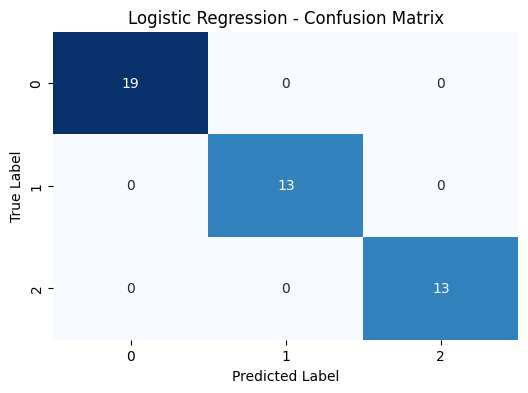

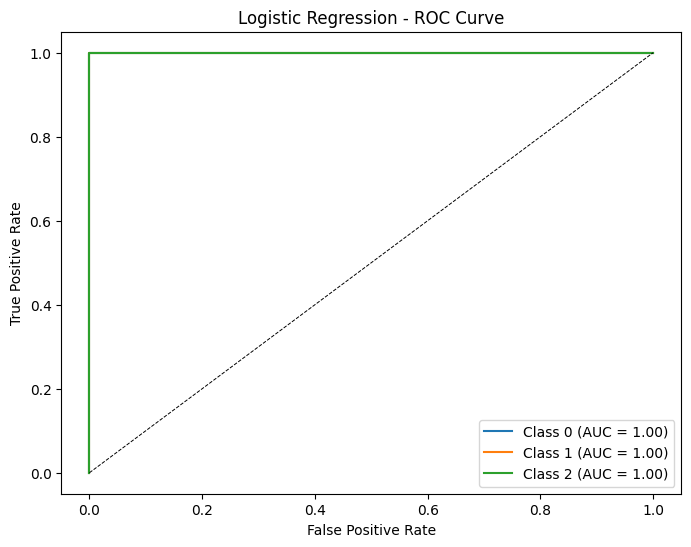


Decision Tree - Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


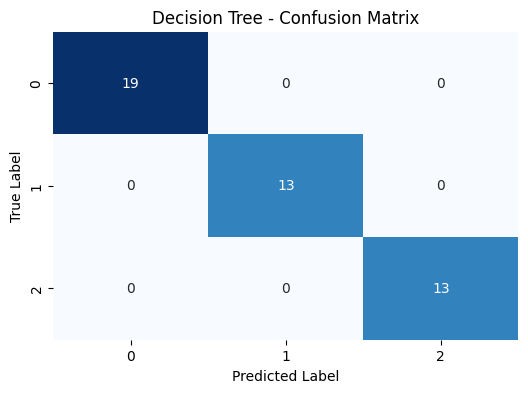

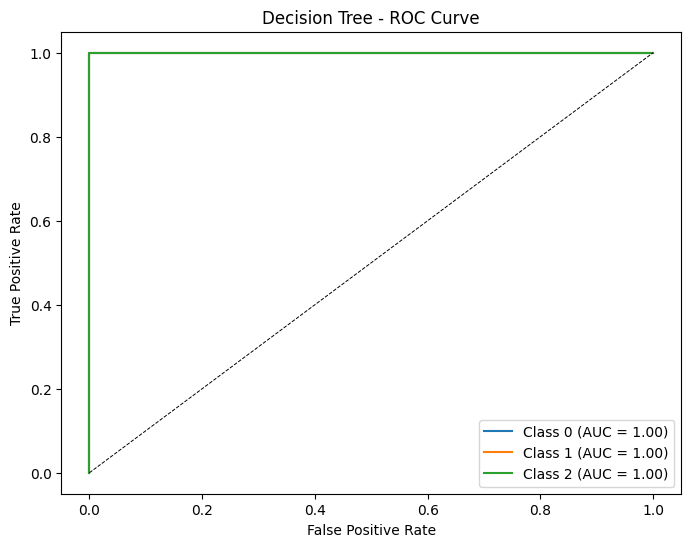


Random Forest - Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


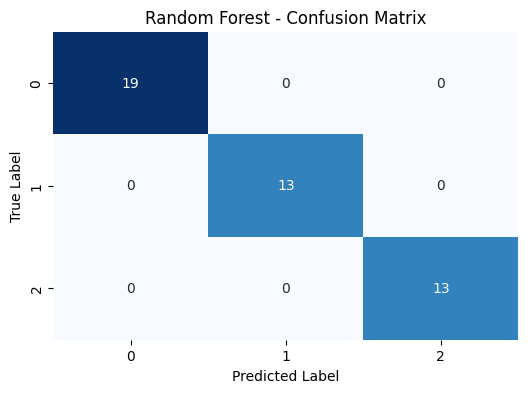

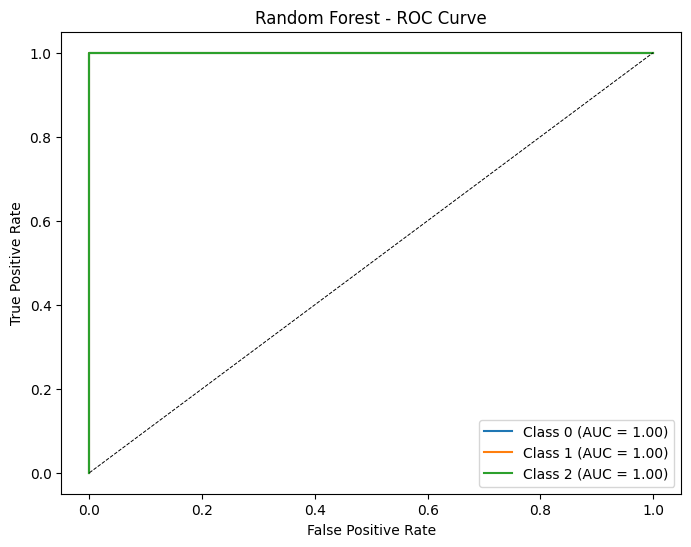

In [9]:
#4.Model Evaluation


# Import necessary libraries for evaluation
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate evaluation metrics for each model
def evaluate_classification_model(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n{model_name} - Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    return accuracy, precision, recall, f1

# Confusion matrix and ROC Curve plotting
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# ROC Curve plot for multiclass (one-vs-rest approach)
def plot_roc_curve(y_test, y_score, model_name):
    plt.figure(figsize=(8, 6))
    for i in range(len(label_encoder.classes_)):
        fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
        auc_score = roc_auc_score(y_test == i, y_score[:, i])
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', linewidth=0.7)
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Evaluate and plot for each model
# Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
evaluate_classification_model("Logistic Regression", y_test, y_pred_log_reg)
plot_confusion_matrix(y_test, y_pred_log_reg, "Logistic Regression")
y_score_log_reg = log_reg.predict_proba(X_test)
plot_roc_curve(y_test, y_score_log_reg, "Logistic Regression")

# Decision Tree
y_pred_decision_tree = decision_tree.predict(X_test)
evaluate_classification_model("Decision Tree", y_test, y_pred_decision_tree)
plot_confusion_matrix(y_test, y_pred_decision_tree, "Decision Tree")
y_score_decision_tree = decision_tree.predict_proba(X_test)
plot_roc_curve(y_test, y_score_decision_tree, "Decision Tree")

# Random Forest
y_pred_random_forest = random_forest.predict(X_test)
evaluate_classification_model("Random Forest", y_test, y_pred_random_forest)
plot_confusion_matrix(y_test, y_pred_random_forest, "Random Forest")
y_score_random_forest = random_forest.predict_proba(X_test)
plot_roc_curve(y_test, y_score_random_forest, "Random Forest")


In [10]:
#5.Hyperparameter Tuning

# Import necessary libraries for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each model
# Logistic Regression parameter grid
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100, 200, 300]
}

# Decision Tree parameter grid
decision_tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Random Forest parameter grid
random_forest_params = {
    'n_estimators': [50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV for each model
log_reg_grid = GridSearchCV(LogisticRegression(random_state=42), log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
decision_tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), decision_tree_params, cv=5, scoring='accuracy', n_jobs=-1)
random_forest_grid = GridSearchCV(RandomForestClassifier(random_state=42), random_forest_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit each model on the training data
log_reg_grid.fit(X_train, y_train)
decision_tree_grid.fit(X_train, y_train)
random_forest_grid.fit(X_train, y_train)

# Get the best parameters and scores for each model
best_log_reg = log_reg_grid.best_estimator_
best_decision_tree = decision_tree_grid.best_estimator_
best_random_forest = random_forest_grid.best_estimator_

print("\nBest Parameters and Scores:")
print("Logistic Regression Best Parameters:", log_reg_grid.best_params_)
print("Logistic Regression Best Score:", log_reg_grid.best_score_)
print("Decision Tree Best Parameters:", decision_tree_grid.best_params_)
print("Decision Tree Best Score:", decision_tree_grid.best_score_)
print("Random Forest Best Parameters:", random_forest_grid.best_params_)
print("Random Forest Best Score:", random_forest_grid.best_score_)

# Evaluate the tuned models on the test set
def evaluate_model_on_test(model, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"\n{model_name} (Tuned) - Test Set Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")

# Evaluate each best model
evaluate_model_on_test(best_log_reg, "Logistic Regression")
evaluate_model_on_test(best_decision_tree, "Decision Tree")
evaluate_model_on_test(best_random_forest, "Random Forest")



Best Parameters and Scores:
Logistic Regression Best Parameters: {'C': 100, 'max_iter': 100, 'solver': 'lbfgs'}
Logistic Regression Best Score: 0.9523809523809523
Decision Tree Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 10}
Decision Tree Best Score: 0.9428571428571428
Random Forest Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Best Score: 0.9428571428571428

Logistic Regression (Tuned) - Test Set Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Decision Tree (Tuned) - Test Set Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Random Forest (Tuned) - Test Set Evaluation:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00



Logistic Regression Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


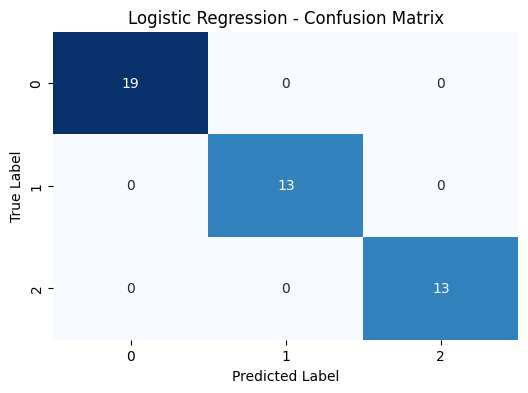


Decision Tree Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


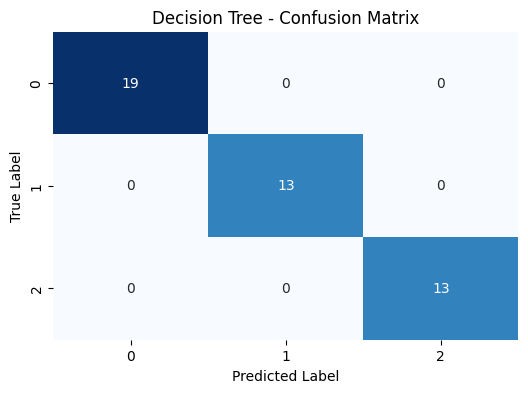


Random Forest Performance:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


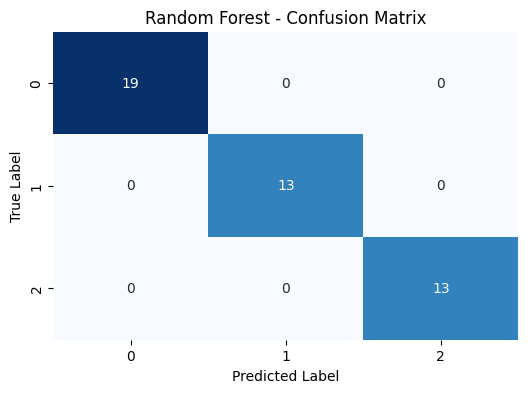

In [11]:
#6.Conclusion

# Import necessary libraries for evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Function to evaluate the model and print metrics
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Evaluate each tuned model on the test set
evaluate_model(best_log_reg, X_test, y_test, "Logistic Regression")
evaluate_model(best_decision_tree, X_test, y_test, "Decision Tree")
evaluate_model(best_random_forest, X_test, y_test, "Random Forest")
